In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel("Data1.xlsx",index_col="DateTime")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4501 entries, 2022-11-11 to 2010-07-17
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Bitcoin Price                  4501 non-null   float64
 1   BTC Network Difficulty         4501 non-null   float64
 2   Bitcoin Circulation            4501 non-null   float64
 3   ALL BTC Transaction            4501 non-null   int64  
 4   BTC Transections over 100000$  4501 non-null   int64  
 5   Ethereum price                 2654 non-null   float64
 6   BTC Hash Rate                  4501 non-null   float64
 7   Active Address                 4501 non-null   int64  
 8   ATM for Crypto                 3329 non-null   float64
 9   VIX Index                      3108 non-null   float64
 10  DXY Index                      3215 non-null   float64
 11  Gold Price                     3210 non-null   float64
 12  Telegram positive sentiments  

In [4]:
data.corr()

,Bitcoin Price,BTC Network Difficulty,Bitcoin Circulation,ALL BTC Transaction,BTC Transections over 100000$,Ethereum price,BTC Hash Rate,Active Address,ATM for Crypto,VIX Index,DXY Index,Gold Price,Telegram positive sentiments,Telegram Negative sentiments,twitter positive sentiments,twitter Negative sentiments
Bitcoin Price,1.000000,0.808505,0.557306,0.474770,0.794442,0.937832,0.806348,0.683538,0.802973,0.204230,0.338231,0.604370,0.252360,0.078873,0.448721,0.360418
BTC Network Difficulty,0.808505,1.000000,0.650541,0.574641,0.713344,0.688374,0.991732,0.738920,0.922139,0.427223,0.550389,0.680261,0.364989,0.227129,0.090883,0.008396
Bitcoin Circulation,0.557306,0.650541,1.000000,0.890169,0.692179,0.633077,0.647851,0.894710,0.684244,0.036462,0.837555,0.155088,0.351760,0.200721,0.294954,0.165330
ALL BTC Transaction,0.474770,0.574641,0.890169,1.000000,0.750303,-0.007060,0.579370,0.937550,0.303649,0.043096,0.822929,0.127771,-0.170164,-0.100723,-0.080047,-0.033751
BTC Transections over 100000$,0.794442,0.713344,0.692179,0.750303,1.000000,0.639817,0.712217,0.867803,0.596285,0.111535,0.508039,0.428666,0.185123,0.127350,0.462519,0.432233
Ethereum price,0.937832,0.688374,0.633077,-0.007060,0.639817,1.000000,0.688305,0.546333,0.817303,0.170785,-0.074494,0.672336,0.380021,0.139088,0.363304,0.270824
BTC Hash Rate,0.806348,0.991732,0.647851,0.579370,0.712217,0.688305,1.000000,0.741168,0.918415,0.417499,0.549945,0.674859,0.359643,0.204514,0.072210,-0.023394
Active Address,0.683538,0.738920,0.894710,0.937550,0.867803,0.546333,0.741168,1.000000,0.595652,0.143172,0.765154,0.314732,0.066611,0.067523,0.445058,0.382037
ATM for Crypto,0.802973,0.922139,0.684244,0.303649,0.596285,0.817303,0.918415,0.595652,1.000000,0.436876,0.423906,0.795068,0.425478,0.237104,0.146863,0.031299
VIX Index,0.204230,0.427223,0.036462,0.043096,0.111535,0.170785,0.417499,0.143172,0.436876,1.000000,0.083559,0.485351,0.033892,0.067482,-0.113985,-0.094641


In [5]:
data = data.drop(["twitter Negative sentiments","DXY Index","Telegram Negative sentiments","Telegram positive sentiments","VIX Index"],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4501 entries, 2022-11-11 to 2010-07-17
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Bitcoin Price                  4501 non-null   float64
 1   BTC Network Difficulty         4501 non-null   float64
 2   Bitcoin Circulation            4501 non-null   float64
 3   ALL BTC Transaction            4501 non-null   int64  
 4   BTC Transections over 100000$  4501 non-null   int64  
 5   Ethereum price                 2654 non-null   float64
 6   BTC Hash Rate                  4501 non-null   float64
 7   Active Address                 4501 non-null   int64  
 8   ATM for Crypto                 3329 non-null   float64
 9   Gold Price                     3210 non-null   float64
 10  twitter positive sentiments    1212 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 422.0 KB


In [7]:
data[data.columns[10:]] = data[data.columns[10:]].fillna(0)

In [8]:
for col in data[data.columns[:10]]:
    data[col] = data[col].fillna(data[col].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4501 entries, 2022-11-11 to 2010-07-17
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Bitcoin Price                  4501 non-null   float64
 1   BTC Network Difficulty         4501 non-null   float64
 2   Bitcoin Circulation            4501 non-null   float64
 3   ALL BTC Transaction            4501 non-null   int64  
 4   BTC Transections over 100000$  4501 non-null   int64  
 5   Ethereum price                 4501 non-null   float64
 6   BTC Hash Rate                  4501 non-null   float64
 7   Active Address                 4501 non-null   int64  
 8   ATM for Crypto                 4501 non-null   float64
 9   Gold Price                     4501 non-null   float64
 10  twitter positive sentiments    4501 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 422.0 KB


In [10]:
BTC_PRICE_MEAN = data["Bitcoin Price"].mean()

In [11]:
dataset = data[::-1]
dataset = dataset.values
dataset = dataset.astype('float64')

In [12]:
# normalize the dataset
price_scaler = MinMaxScaler(feature_range=(0, 1))
feature_scaler = MinMaxScaler(feature_range=(0, 1))
dataset[:,0] = price_scaler.fit_transform(dataset[:,0].reshape(-1, 1)).reshape(1,-1)
dataset[:,1:] = feature_scaler.fit_transform(dataset[:,1:])

In [13]:
dataset

array([[7.56527374e-09, 0.00000000e+00, 1.74473151e-04, ...,
        2.10109503e-01, 4.02543410e-01, 0.00000000e+00],
       [3.50524350e-07, 1.38455817e-24, 0.00000000e+00, ...,
        2.10109503e-01, 4.02543410e-01, 0.00000000e+00],
       [5.36244403e-07, 0.00000000e+00, 1.25937892e-03, ...,
        2.10109503e-01, 1.30386238e-01, 0.00000000e+00],
       ...,
       [2.53129031e-01, 9.98005094e-01, 9.99885403e-01, ...,
        9.97941646e-01, 6.46980940e-01, 1.92838334e-01],
       [2.50603268e-01, 9.98005094e-01, 9.99942503e-01, ...,
        9.97941646e-01, 6.92165562e-01, 1.79469289e-01],
       [2.52379327e-01, 9.98005094e-01, 1.00000000e+00, ...,
        9.97941646e-01, 7.11097059e-01, 1.90024983e-01]])

In [14]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 1:]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
# split into train and test sets
train_size = int(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [40]:
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64,activation="relu", input_shape=(look_back,10), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
model.fit(trainX, trainY, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
17/17 [==============================] - 4s 89ms/step - loss: 0.0161
Epoch 2/10
17/17 [==============================] - 1s 86ms/step - loss: 0.0041
Epoch 3/10
17/17 [==============================] - 2s 93ms/step - loss: 0.0029
Epoch 4/10
17/17 [==============================] - 2s 88ms/step - loss: 0.0019
Epoch 5/10
17/17 [==============================] - 2s 97ms/step - loss: 0.0014
Epoch 6/10
17/17 [==============================] - 2s 91ms/step - loss: 0.0013
Epoch 7/10
17/17 [==============================] - 2s 109ms/step - loss: 0.0011
Epoch 8/10
17/17 [==============================] - 2s 100ms/step - loss: 9.1350e-04
Epoch 9/10
17/17 [==============================] - 2s 95ms/step - loss: 8.0558e-04
Epoch 10/10
17/17 [==============================] - 2s 89ms/step - loss: 9.1090e-04


In [41]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

21/21 [==============================] - 0s 11ms/step


In [42]:
# invert predictions
trainpred_scaled = price_scaler.inverse_transform(trainPredict)
trainY_scaled = price_scaler.inverse_transform(trainY.reshape(-1, 1)).reshape(1,-1)
testpred_scaled = price_scaler.inverse_transform(testPredict)
testY_scaled = price_scaler.inverse_transform(testY.reshape(-1, 1)).reshape(1,-1)

In [48]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_scaled[0], trainpred_scaled[:,0]))/BTC_PRICE_MEAN
print('Score: %.3f RMSE' % (trainScore))

Score: 0.092 RMSE


In [44]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainpred_scaled)+look_back, :] = trainpred_scaled
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainpred_scaled)+(look_back*2)+1:len(dataset)-1, :] = testpred_scaled

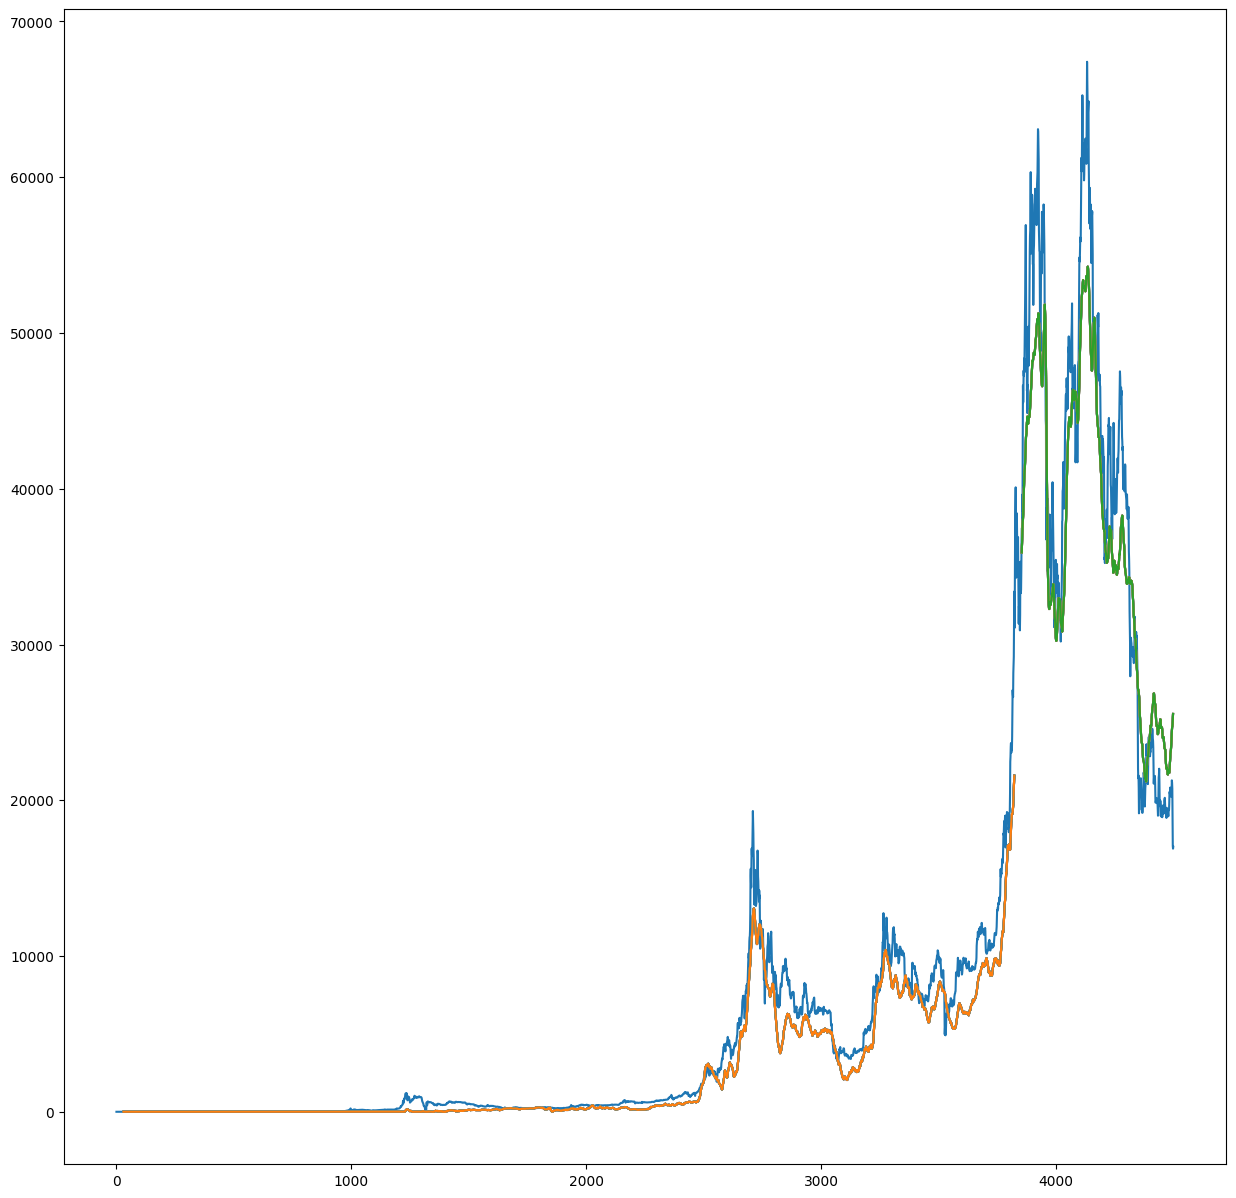

In [45]:
# plot baseline and predictions
plt.figure(figsize=(15,15))
plt.plot(np.abs(price_scaler.inverse_transform(dataset[:,0].reshape(-1, 1))))
plt.plot(np.abs(trainPredictPlot))
plt.plot(np.abs(testPredictPlot))
plt.show()